# Comparing seasonality using the xml data only
#### We want to compare users on platform vs users not on platform, on summer and winter 2017

In [19]:
import sys
import os
print('System version:',sys.version)

import pandas as pd
from pandas import DataFrame, Series
pd.set_option('precision',3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print('Pandas version:',pd.__version__)
 
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (18,5)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
 
 
import seaborn as sns
print('Seaborn version:',sns.__version__)
 
import numpy as np
print('Numpy version:',np.__version__)

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

System version: 3.5.3 |Continuum Analytics, Inc.| (default, May 15 2017, 10:43:23) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.20.2
Seaborn version: 0.7.1
Numpy version: 1.12.1


Loading BokehJS ...

In [20]:
df_not = pd.read_excel('D:/github/averages/xml_meters_not_on_platform_daily_consumptions_2016-6-1_to_2016-8-31.xlsx')
df_on = pd.read_excel('D:/github/averages/xml_meters_on_platform_daily_consumptions_2016-6-1_to_2016-8-31.xlsx')

In [21]:
df_not.describe()

,total consumption in 92 days,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
count,262.000,262.000,262.000,262.000,262.000,262.000,262.000,262.000,262.000,262.000,...,262.000,262.000,262.000,262.000,262.000,262.000,262.000,262.000,262.000,262.000
mean,1362480.308,150559.538,79746.344,168351.839,-181972.270,799786.495,-470037.057,471874.721,-36023.695,-202102.386,...,-86872.232,122102.779,527181.745,-18954.885,-980376.830,533819.620,192109.440,193700.636,-317499.436,-155698.598
std,7704417.204,2437011.779,3776239.506,4269487.408,2927889.996,5727188.326,6827253.725,4596499.248,6776211.968,7484433.569,...,6521143.698,3778859.132,6675060.982,5637528.440,6434341.615,3303696.654,2867050.368,5910360.371,3945406.316,2520213.981
min,0.000,0.000,-39446481.722,-43342744.512,-42833240.023,-3902908.250,-44267619.218,-7615605.086,-43245977.555,-46248369.126,...,-43343169.918,-21142923.322,-44267208.776,-48006451.601,-45714858.975,0.000,-31738915.968,-45219073.729,-48049903.257,-40793226.272
25%,15.954,0.080,0.053,0.066,0.066,0.055,0.080,0.040,0.048,0.061,...,0.093,0.079,0.090,0.077,0.088,0.131,0.123,0.069,0.053,0.053
50%,47.642,0.276,0.288,0.305,0.299,0.331,0.319,0.301,0.307,0.303,...,0.415,0.384,0.413,0.397,0.521,0.520,0.479,0.463,0.331,0.383
75%,86.486,0.599,0.564,0.613,0.586,0.698,0.646,0.659,0.650,0.613,...,0.875,0.806,0.979,0.922,0.978,1.128,1.025,0.858,0.650,0.909
max,47260833.943,39446482.163,43342745.926,42833240.025,11009521.324,44267619.220,41430615.533,48284223.668,46248369.439,43437199.888,...,44617576.453,44267211.761,48006456.454,45623895.128,11649229.165,23534734.410,15946048.802,41278945.459,9869319.051,11.465


In [22]:
df_not2 = df_not[~((df_not[df_not.columns[2:]]) < 0).any(1)]
df_not2 = df_not2[~((df_not2[df_not2.columns[2:]]) > 500).any(1)]
df_not2.describe()

,total consumption in 92 days,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
count,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000,...,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000,188.000
mean,60.101,0.479,0.462,0.473,0.441,0.490,0.511,0.491,0.485,0.512,...,0.709,0.636,0.684,0.903,0.856,0.830,0.777,0.764,0.648,0.800
std,58.812,0.571,0.694,0.512,0.472,0.512,0.536,0.578,0.564,0.866,...,1.150,0.739,0.809,2.115,1.087,1.053,0.978,1.292,1.116,1.231
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,16.462,0.089,0.085,0.079,0.091,0.078,0.097,0.064,0.079,0.078,...,0.096,0.091,0.103,0.097,0.120,0.140,0.150,0.133,0.110,0.133
50%,47.642,0.308,0.325,0.361,0.331,0.374,0.361,0.336,0.341,0.322,...,0.425,0.444,0.421,0.408,0.547,0.520,0.489,0.466,0.409,0.449
75%,81.812,0.636,0.570,0.666,0.602,0.684,0.688,0.675,0.666,0.644,...,0.867,0.844,0.962,0.898,0.986,1.062,0.983,0.834,0.751,0.941
max,349.820,3.420,7.754,3.018,2.899,3.103,2.917,4.397,3.714,10.085,...,12.191,4.401,5.266,21.770,6.768,7.265,6.673,12.492,11.450,11.465


In [23]:
df_on2 = df_on[~((df_on[df_on.columns[2:]]) < 0).any(1)]
df_on2 = df_on2[~((df_on2[df_on2.columns[2:]]) > 500).any(1)]
df_on2.describe()

,total consumption in 92 days,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
count,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,...,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000
mean,83.491,0.698,0.642,0.821,0.643,0.682,0.606,0.628,0.615,0.612,...,0.955,0.991,1.073,0.927,1.272,1.103,1.028,1.112,0.865,1.078
std,75.900,0.701,0.617,0.895,0.693,0.802,0.600,0.724,0.687,0.677,...,1.024,1.202,1.317,0.922,1.247,1.034,0.965,1.258,0.914,1.174
min,6.561,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,32.960,0.261,0.295,0.311,0.320,0.305,0.262,0.203,0.223,0.253,...,0.236,0.255,0.353,0.372,0.348,0.388,0.369,0.321,0.299,0.316
50%,49.614,0.400,0.435,0.477,0.457,0.426,0.374,0.419,0.385,0.358,...,0.467,0.455,0.515,0.504,0.827,0.682,0.637,0.657,0.553,0.464
75%,114.649,0.821,0.836,0.977,0.659,0.712,0.728,0.693,0.831,0.777,...,1.400,1.288,1.170,1.080,1.792,1.522,1.413,1.360,0.876,1.516
max,337.630,3.080,2.980,3.703,3.350,3.680,2.820,3.110,3.390,3.090,...,4.230,5.422,6.158,3.600,4.882,3.958,3.678,5.120,3.470,4.860


In [24]:
index=(df_on2.columns[2:])
not_means = pd.Series(index=index)
on_means = pd.Series(index=index)
for day in df_on2.columns[2:]:
    not_means[day] = df_not2[day].mean()
    on_means[day] = df_on2[day].mean()
df_comp = pd.DataFrame()
df_comp['notonplatform'] = not_means[2:]
df_comp['onplatform'] = on_means[2:]

#### checkout the transpose

In [25]:
df_comp.T

,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
notonplatform,0.473,0.441,0.490,0.511,0.491,0.485,0.512,0.516,0.442,0.506,...,0.709,0.636,0.684,0.903,0.856,0.830,0.777,0.764,0.648,0.800
onplatform,0.821,0.643,0.682,0.606,0.628,0.615,0.612,0.733,0.603,0.814,...,0.955,0.991,1.073,0.927,1.272,1.103,1.028,1.112,0.865,1.078


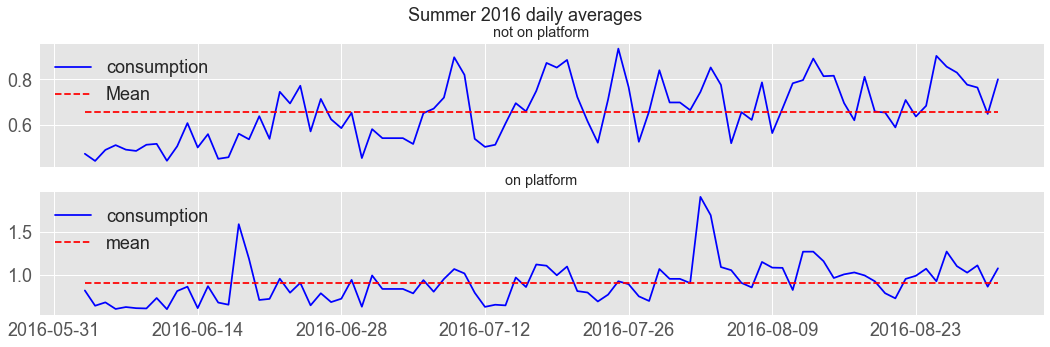

In [26]:
import matplotlib
matplotlib.style.use('ggplot')
t=pd.to_datetime(df_comp.index)
ax1 = plt.subplot(211)
ax1.title.set_text('not on platform')
plt.plot(t, df_comp.notonplatform, 'b', label='consumption')
y_mean = [df_comp.notonplatform.mean() for i in t]
ax1.plot(t,y_mean, 'r', label='Mean', linestyle='--')
ax1.legend(loc='upper left')

plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t, df_comp.onplatform, 'b', label='consumption')
y_mean2 = [df_comp.onplatform.mean() for i in t]
ax2.title.set_text('on platform')
ax2.plot(t,y_mean2, 'r', label='mean', linestyle='--')
ax2.legend(loc='upper left')

plt.suptitle("Summer 2016 daily averages")
plt.show()

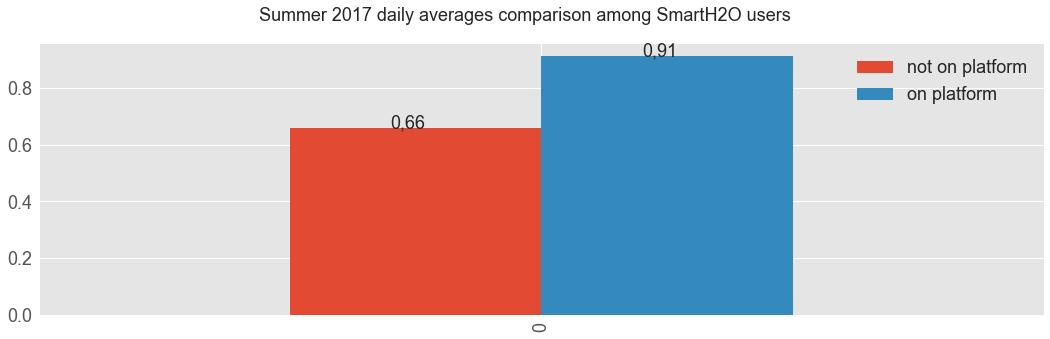

In [27]:
import locale
locale.setlocale(locale.LC_NUMERIC, 'German')
#matplotlib.style.use('ggplot')
df_comp_summer = pd.DataFrame()
df_comp_summer['not on platform'] = [df_comp.notonplatform.mean()]
df_comp_summer['on platform'] = [df_comp.onplatform.mean()]
ax = df_comp_summer.plot.bar()
df_summer=df_comp.copy()
ax.text(-0.15,df_comp.notonplatform.mean()+0 ,locale.format('%.2f', df_comp.notonplatform.mean(), True),fontsize=18);
ax.text(0.10,df_comp.onplatform.mean()+0 ,locale.format('%.2f',df_comp.onplatform.mean(), True),fontsize=18);
plt.suptitle('Summer 2017 daily averages comparison among SmartH2O users');

#### Do the same for winter


In [28]:
df_not = pd.read_excel('D:/github/averages/xml_meters_not_on_platform_daily_consumptions_2016-12-1_to_2017-2-28.xlsx')
df_on = pd.read_excel('D:/github/averages/xml_meters_on_platform_daily_consumptions_2016-12-1_to_2017-2-28.xlsx')

In [29]:
df_not.describe()

,total consumption in 90 days,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,...,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28
count,272.000,272.000,272.000,272.000,272.000,272.000,272.000,272.000,272.000,272.000,...,272.000,272.000,272.000,272.000,272.000,272.000,272.000,272.000,272.000,272.000
mean,-375761.400,-773726.402,-195576.290,-176971.319,46724.845,724138.022,-871706.636,517762.613,-394017.038,-204009.102,...,-123791.549,-398409.060,588171.588,-94633.237,259300.544,-853033.312,379717.755,94501.798,-89499.467,715814.837
std,10727597.877,7550226.373,6813932.559,3150219.628,7387543.296,7351971.323,6538874.867,6576533.487,4311631.509,3099373.722,...,5461138.360,6550135.768,6556387.901,6649605.093,6155659.145,7034647.562,5380486.418,5658801.066,3697704.793,9580269.993
min,-51224030.880,-50991964.172,-50991780.724,-50991086.498,-50991693.789,-50991175.231,-50991334.300,-50991651.073,-50991728.183,-50991163.098,...,-50991358.792,-50991711.979,-50991963.971,-50991711.477,-50991771.306,-51224030.880,-43706875.933,-50991651.073,-50991063.308,-50991863.303
25%,5.446,0.004,0.003,0.000,0.001,0.001,0.000,0.019,0.000,0.002,...,0.000,0.010,0.021,0.001,0.009,0.000,0.000,0.000,0.000,0.000
50%,27.156,0.259,0.280,0.255,0.250,0.254,0.234,0.272,0.295,0.255,...,0.264,0.301,0.250,0.273,0.249,0.282,0.308,0.260,0.242,0.256
75%,47.588,0.536,0.544,0.556,0.511,0.557,0.486,0.564,0.538,0.520,...,0.570,0.537,0.490,0.551,0.563,0.546,0.562,0.538,0.521,0.518
max,50991953.731,50991781.140,50991863.305,9341937.242,50991651.073,50991729.161,9341937.242,50991711.980,3.318,1987753.725,...,50991712.358,50991963.971,50991711.979,50991771.705,50991711.477,30031556.703,50991067.142,50991771.157,33075672.063,50991651.073


In [30]:
df_not2 = df_not[~((df_not[df_not.columns[2:]]) < 0).any(1)]
df_not2 = df_not2[~((df_not2[df_not2.columns[2:]]) > 500).any(1)]
df_not2.describe()

,total consumption in 90 days,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,...,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28
count,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,...,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000
mean,36.830,0.426,0.438,0.463,0.381,0.395,0.387,0.386,0.413,0.393,...,0.421,0.386,0.356,0.414,0.476,0.402,0.418,0.384,0.390,0.361
std,39.170,0.718,0.697,0.928,0.438,0.437,0.450,0.406,0.472,0.435,...,0.555,0.410,0.391,0.496,1.585,0.439,0.553,0.445,0.482,0.448
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,10.001,0.057,0.059,0.067,0.032,0.021,0.075,0.081,0.077,0.051,...,0.009,0.035,0.059,0.066,0.048,0.046,0.040,0.007,0.001,0.000
50%,28.963,0.286,0.298,0.279,0.279,0.283,0.274,0.295,0.313,0.294,...,0.281,0.314,0.271,0.315,0.275,0.306,0.321,0.294,0.294,0.265
75%,48.258,0.549,0.557,0.571,0.517,0.558,0.528,0.565,0.576,0.527,...,0.570,0.541,0.483,0.552,0.559,0.580,0.560,0.545,0.568,0.499
max,329.113,9.112,8.525,12.140,2.859,2.198,2.719,2.062,3.318,2.184,...,4.614,2.520,2.710,4.093,23.174,2.800,4.883,3.587,4.070,3.450


In [31]:
df_on2 = df_on[~((df_on[df_on.columns[2:]]) < 0).any(1)]
df_on2 = df_on2[~((df_on2[df_on2.columns[2:]]) > 500).any(1)]
df_on2.describe()

,total consumption in 90 days,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,...,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28
count,39.000,39.000,39.000,39.000,39.000,39.000,39.000,39.000,39.000,39.000,...,39.000,39.000,39.000,39.000,39.000,39.000,39.000,39.000,39.000,39.000
mean,76.863,0.820,0.866,0.876,0.926,0.870,0.756,0.858,1.081,0.874,...,0.962,0.834,0.785,0.848,0.874,0.960,0.850,0.792,0.835,0.808
std,194.255,2.228,2.136,2.106,2.175,2.174,2.136,2.142,3.012,2.121,...,2.163,2.163,2.177,2.158,2.184,2.625,2.140,2.136,2.137,2.138
min,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,24.585,0.201,0.221,0.253,0.243,0.272,0.166,0.182,0.238,0.194,...,0.305,0.211,0.186,0.199,0.218,0.243,0.262,0.181,0.207,0.175
50%,32.591,0.348,0.400,0.409,0.419,0.360,0.265,0.318,0.395,0.447,...,0.423,0.383,0.374,0.350,0.399,0.388,0.422,0.326,0.330,0.334
75%,57.203,0.483,0.656,0.697,0.726,0.690,0.405,0.698,0.855,0.640,...,0.816,0.630,0.608,0.599,0.632,0.668,0.577,0.534,0.570,0.529
max,1231.966,14.051,13.408,13.206,13.667,13.734,13.438,13.395,19.001,13.359,...,13.596,13.672,13.798,13.573,13.678,16.584,13.523,13.342,13.426,13.503


In [32]:
index=(df_on2.columns[2:])
not_means = pd.Series(index=index)
on_means = pd.Series(index=index)
for day in df_on2.columns[2:]:
    not_means[day] = df_not2[day].mean()
    on_means[day] = df_on2[day].mean()
df_comp = pd.DataFrame()
df_comp['notonplatform'] = not_means[2:]
df_comp['onplatform'] = on_means[2:]

#### checkout the transpose

In [33]:
df_comp.T

,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,...,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28
notonplatform,0.463,0.381,0.395,0.387,0.386,0.413,0.393,0.400,0.418,0.398,...,0.421,0.386,0.356,0.414,0.476,0.402,0.418,0.384,0.390,0.361
onplatform,0.876,0.926,0.870,0.756,0.858,1.081,0.874,0.842,0.903,0.836,...,0.962,0.834,0.785,0.848,0.874,0.960,0.850,0.792,0.835,0.808


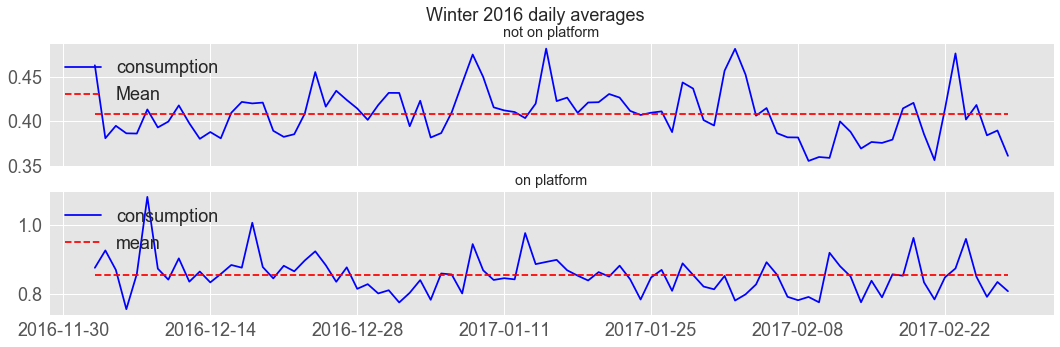

In [34]:
import matplotlib
matplotlib.style.use('ggplot')
t=pd.to_datetime(df_comp.index)
ax1 = plt.subplot(211)
ax1.title.set_text('not on platform')
plt.plot(t, df_comp.notonplatform, 'b', label='consumption')
y_mean = [df_comp.notonplatform.mean() for i in t]
ax1.plot(t,y_mean, 'r', label='Mean', linestyle='--')
ax1.legend(loc='upper left')

plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t, df_comp.onplatform, 'b', label='consumption')
y_mean2 = [df_comp.onplatform.mean() for i in t]
ax2.title.set_text('on platform')
ax2.plot(t,y_mean2, 'r', label='mean', linestyle='--')
ax2.legend(loc='upper left')

plt.suptitle("Winter 2016 daily averages")
plt.show()

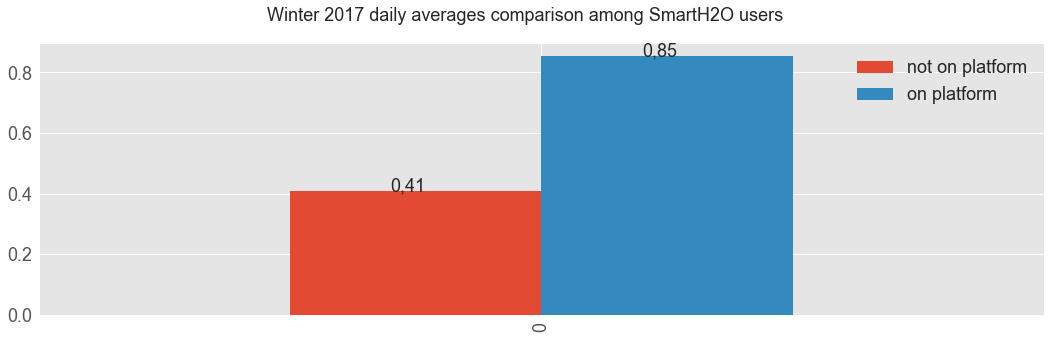

In [35]:
import locale
locale.setlocale(locale.LC_NUMERIC, 'German')
#matplotlib.style.use('ggplot')
df_comp_winter = pd.DataFrame()
df_comp_winter['not on platform'] = [df_comp.notonplatform.mean()]
df_comp_winter['on platform'] = [df_comp.onplatform.mean()]
ax = df_comp_winter.plot.bar()
df_winter = df_comp.copy()
ax.text(-0.15,df_comp.notonplatform.mean()+0 ,locale.format('%.2f', df_comp.notonplatform.mean(), True),fontsize=18);
ax.text(0.10,df_comp.onplatform.mean()+0 ,locale.format('%.2f',df_comp.onplatform.mean(), True),fontsize=18);
plt.suptitle('Winter 2017 daily averages comparison among SmartH2O users');

#### Plotting the averages comparison

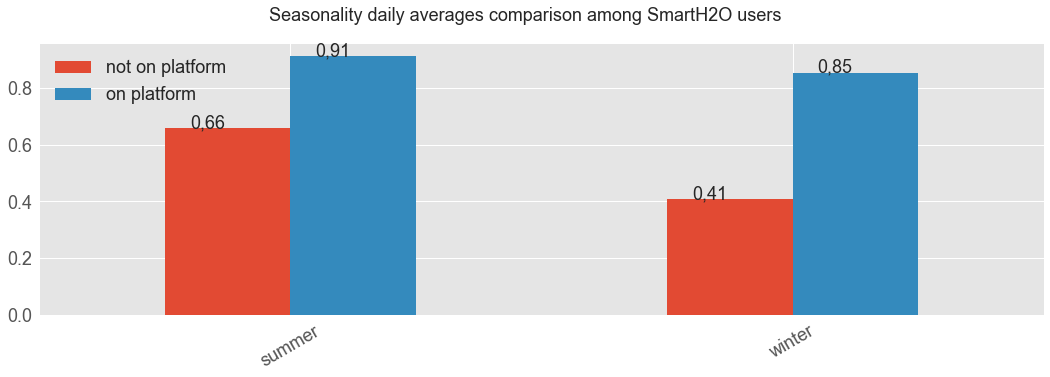

In [36]:
df_comp_summer.index =['summer']
df_comp_winter.index=['winter']
df_comp = df_comp_summer.append(df_comp_winter)
ax = df_comp.plot.bar()
ax.text(-0.2,df_summer.notonplatform.mean()+0 ,locale.format('%.2f', df_summer.notonplatform.mean(), True),fontsize=18);
ax.text(0.05,df_summer.onplatform.mean()+0 ,locale.format('%.2f',df_summer.onplatform.mean(), True),fontsize=18 );
ax.text(0.8,df_winter.notonplatform.mean()+0 ,locale.format('%.2f', df_winter.notonplatform.mean(), True),fontsize=18);
ax.text(1.05,df_winter.onplatform.mean()+0 ,locale.format('%.2f',df_winter.onplatform.mean(), True),fontsize=18);
plt.xticks(rotation=30);
plt.suptitle('Seasonality daily averages comparison among SmartH2O users');